In [10]:
import os
import numpy as np
import pandas as pd
import h5py
import pylab as P

# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
# Set main model directory to parent directory
model_dir = os.path.dirname(os.getcwd())
base_dir = r'R:\SoundCast\Inputs\2010\etc'

In [12]:
# Read Model Scenario Results
scen = h5py.File(model_dir + r'/outputs/daysim_outputs.h5','r+')
scen_name = 'Model: 2040'

In [13]:
# Read Base Data
base_file = '/daysim_outputs_seed_trips.h5'

base = h5py.File(base_dir + base_file ,'r+')
base_name = '2010 Base'

In [14]:
def barchart(fieldvar, fieldname, base, scen, labels, base_name, scen_name):
    ''' Create pyplot bar chart for base and scenario comparison. Assumes variables and datasets are similarly formatted. '''
    
    container = 'Trip'
    
    # Sum by worker type for base
    df = pd.DataFrame(np.asarray(base[container][fieldvar]), columns=[fieldvar])
    df[fieldname] = [labels[x] for x in df[fieldvar].as_matrix()]
    df_base = df.groupby(fieldname).count()[fieldvar]    # Sum by category
    df_base = df_base/df_base.sum()     # Convert totals to shares
    
    # Sum by worker type for scenario
    df = pd.DataFrame(np.asarray(scen[container][fieldvar]), columns=[fieldvar])
    df[fieldname] = [labels[x] for x in df[fieldvar].as_matrix()]
    df_scen = df.groupby(fieldname).count()[fieldvar]    # Sum by category
    df_scen = df_scen/df_scen.sum()     # Convert totals to shares

    # Set bar chart params
    ind = np.arange(len(df_base))    # index array to match dataset size
    width = 0.3    # width of bars

    # Initialize bar chart object
    fig, ax = P.subplots()    

    base_bar = ax.bar(ind, df_base.values, width=width, color='grey', alpha=0.3)    # plot scenario data
    scen_bar = ax.bar(ind+width, df_scen.values, width=width, color='b')    # plot base data (note the index offset by the bar width)
    ax.set_xticks(ind+width)   
    ax.set_xticklabels(df_base.index, rotation=90)
    ax.set_title(fieldname)
    ax.legend((base_bar, scen_bar), (base_name, scen_name))

In [15]:
####################
# Trip Purpose
####################

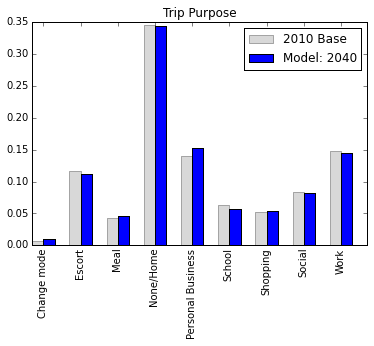

In [16]:
# Bar chart for comparing trip purpose distributions

purp_labels = {
  0: "None/Home",  
  1: "Work",
  2: "School",
  3: "Escort",
  4: "Personal Business",
  5: "Shopping",
  6: "Meal",
  7: "Social",
  8: "Recreational",
  9: "Medical",
  10: "Change mode"
}

barchart('dpurp', 'Trip Purpose', base, scen, purp_labels, base_name, scen_name)

In [15]:
####################
# Trip Length
####################

In [16]:
varname = 'travdist'

triplen_base = np.asarray(base['Trip'][varname])
triplen_scen = np.asarray(scen['Trip'][varname])

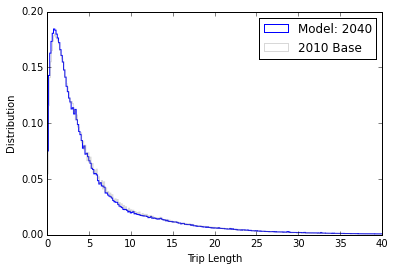

In [17]:
bins = 1000

P.hist(triplen_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)
P.hist(triplen_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
P.xlim([0,40])    # Cutting the tail at 40 to focus on shorter trip distribution
P.xlabel('Trip Length')
P.ylabel('Distribution')
P.legend()

In [ ]:
####################
# Travel Time
####################

In [19]:
varname = 'travtime'

triptime_base = np.asarray(base['Trip'][varname])
triptime_scen = np.asarray(scen['Trip'][varname])

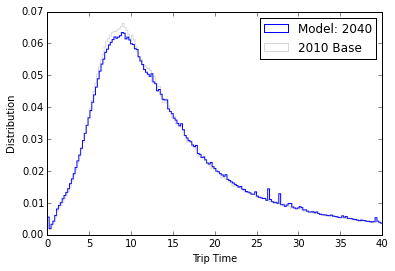

In [20]:
bins = 1000

P.hist(triptime_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)
P.hist(triptime_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
P.xlim([0,40])    # Cutting the tail at 40 to focus on shorter trip distribution
P.xlabel('Trip Time')
P.ylabel('Distribution')
P.legend()

In [ ]:
####################
# Value of Time
####################

In [28]:
varname = 'vot'

vot_base = np.asarray(base['Trip'][varname])
vot_scen = np.asarray(scen['Trip'][varname])

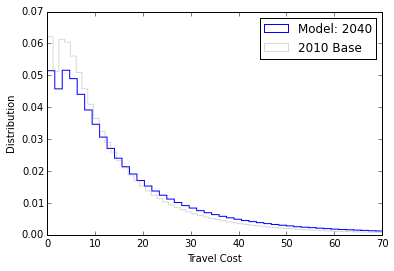

In [33]:
bins = 1000

P.hist(vot_scen, bins=bins, normed=True, histtype='step', color='b', label=scen_name)
P.hist(vot_base, bins=bins, normed=True, histtype='step', color='grey', alpha=0.3, label=base_name)
P.xlim([0,70])    # Cutting the tail at 70 to focus on shorter trip distribution
P.xlabel('Value of Time')
P.ylabel('Distribution')
P.legend()